<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/umkm_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving umkm_sukabumi.csv to umkm_sukabumi.csv
1. ANALISIS DATA AWAL

a. Distribusi Gender:
Jenis Kelamin
Perempuan     70
Laki- Laki    18
Laki-Laki      9
Name: count, dtype: int64


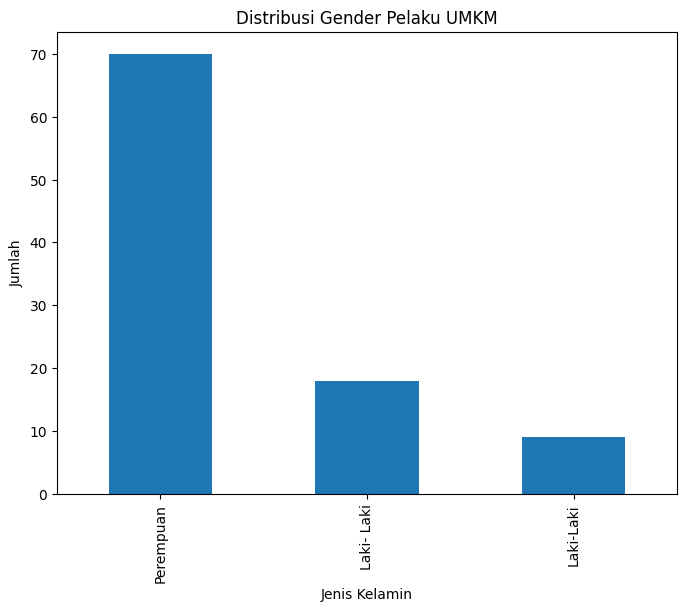


b. Statistik Deskriptif:
          TTL X1     TTL X2     TTL X3    Total Y
count  97.000000  97.000000  97.000000  97.000000
mean   21.958763  26.608247  26.278351  26.670103
std     2.318034   2.289272   2.312747   2.230105
min    14.000000  22.000000  20.000000  19.000000
25%    21.000000  25.000000  25.000000  25.000000
50%    22.000000  27.000000  26.000000  27.000000
75%    24.000000  28.000000  28.000000  28.000000
max    25.000000  30.000000  30.000000  30.000000


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload file
uploaded = files.upload()  # Upload umkm_sukabumi.csv

# Load data
def load_and_analyze_initial_data():
    df = pd.read_csv('umkm_sukabumi.csv', skiprows=1)
    df = df.iloc[:97]  # Remove empty rows

    print("1. ANALISIS DATA AWAL")
    print("\na. Distribusi Gender:")
    gender_dist = df['Jenis Kelamin'].value_counts()
    print(gender_dist)

    plt.figure(figsize=(8, 6))
    gender_dist.plot(kind='bar')
    plt.title('Distribusi Gender Pelaku UMKM')
    plt.ylabel('Jumlah')
    plt.show()

    print("\nb. Statistik Deskriptif:")
    print(df[['TTL X1', 'TTL X2', 'TTL X3', 'Total Y']].describe())

    return df

df = load_and_analyze_initial_data()

In [2]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    print("\n2. DATA PRE-PROCESSING")

    # Define columns
    X1_cols = [f'X1.{i}' for i in range(1,6)]
    X2_cols = [f'X2.{i}' for i in range(1,7)]
    X3_cols = [f'X3.{i}' for i in range(1,7)]
    Y_cols = [f'Y{i}' for i in range(1,7)]
    feature_cols = X1_cols + X2_cols + X3_cols + Y_cols

    # Check missing values
    print("\na. Missing Values:")
    print(df[feature_cols].isnull().sum())

    # Statistics before normalization
    print("\nb. Statistik Sebelum Normalisasi:")
    print(df[feature_cols].describe())

    # Normalize features
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(df[feature_cols])
    normalized_df = pd.DataFrame(normalized_features, columns=feature_cols)

    print("\nc. Statistik Setelah Normalisasi:")
    print(normalized_df.describe())

    return normalized_features, df[feature_cols]

normalized_features, feature_df = preprocess_data(df)


2. DATA PRE-PROCESSING

a. Missing Values:
X1.1    0
X1.2    0
X1.3    0
X1.4    0
X1.5    0
X2.1    0
X2.2    0
X2.3    0
X2.4    0
X2.5    0
X2.6    0
X3.1    0
X3.2    0
X3.3    0
X3.4    0
X3.5    0
X3.6    0
Y1      0
Y2      0
Y3      0
Y4      0
Y5      0
Y6      0
dtype: int64

b. Statistik Sebelum Normalisasi:
            X1.1       X1.2       X1.3       X1.4       X1.5       X2.1  \
count  97.000000  97.000000  97.000000  97.000000  97.000000  97.000000   
mean    4.453608   4.381443   4.226804   4.278351   4.618557   4.597938   
std     0.577722   0.698858   0.770621   0.746412   0.509152   0.513562   
min     2.000000   2.000000   2.000000   2.000000   3.000000   3.000000   
25%     4.000000   4.000000   4.000000   4.000000   4.000000   4.000000   
50%     4.000000   4.000000   4.000000   4.000000   5.000000   5.000000   
75%     5.000000   5.000000   5.000000   5.000000   5.000000   5.000000   
max     5.000000   5.000000   5.000000   5.000000   5.000000   5.000000   

  


3. ANALISIS DATA


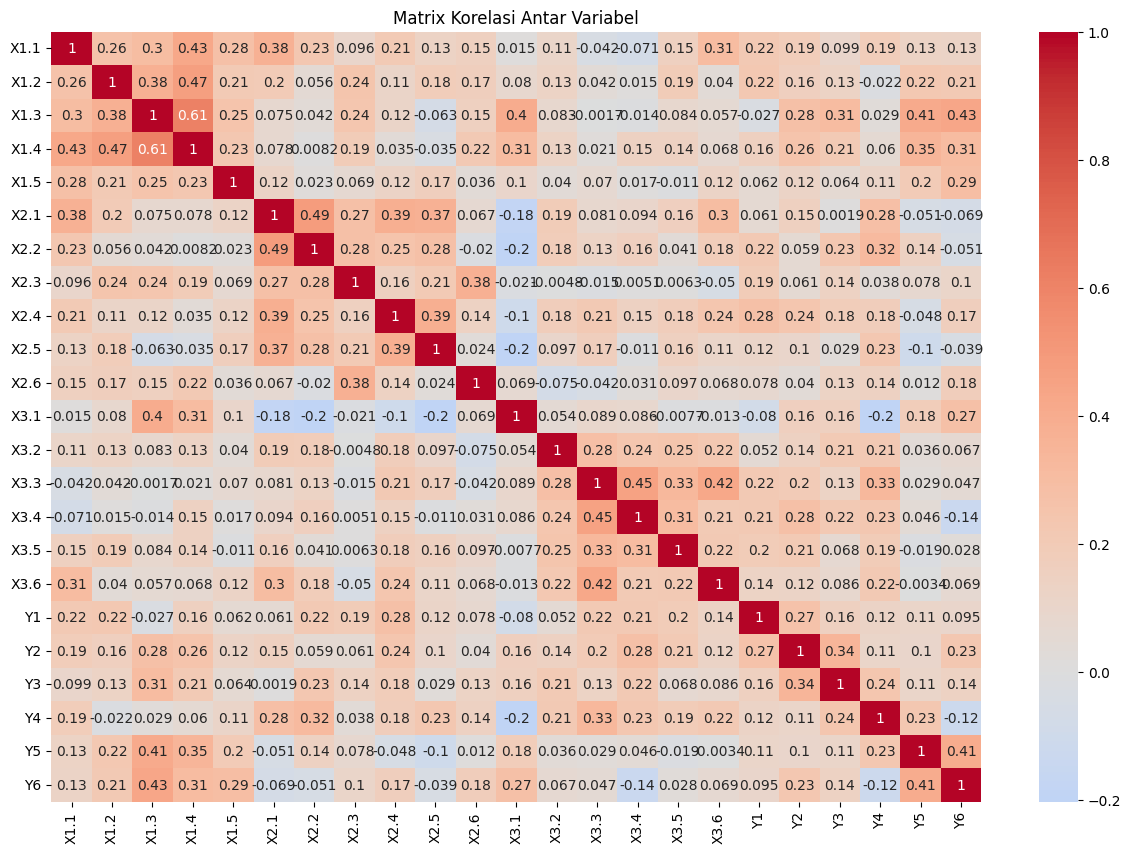


a. Korelasi Signifikan (|r| > 0.5):

X1.3:
- X1.4: 0.613

X1.4:
- X1.3: 0.613


In [3]:
def analyze_data(feature_df):
    print("\n3. ANALISIS DATA")

    # Correlation analysis
    correlation_matrix = feature_df.corr()

    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matrix Korelasi Antar Variabel')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

    # Analyze strong correlations
    print("\na. Korelasi Signifikan (|r| > 0.5):")
    for col in correlation_matrix.columns:
        strong = correlation_matrix[col][
            (correlation_matrix[col].abs() > 0.5) &
            (correlation_matrix[col].index != col)
        ]
        if not strong.empty:
            print(f"\n{col}:")
            for idx, val in strong.items():
                print(f"- {idx}: {val:.3f}")

analyze_data(feature_df)

In [5]:
!pip install kneed


4. IMPLEMENTASI K-MEANS


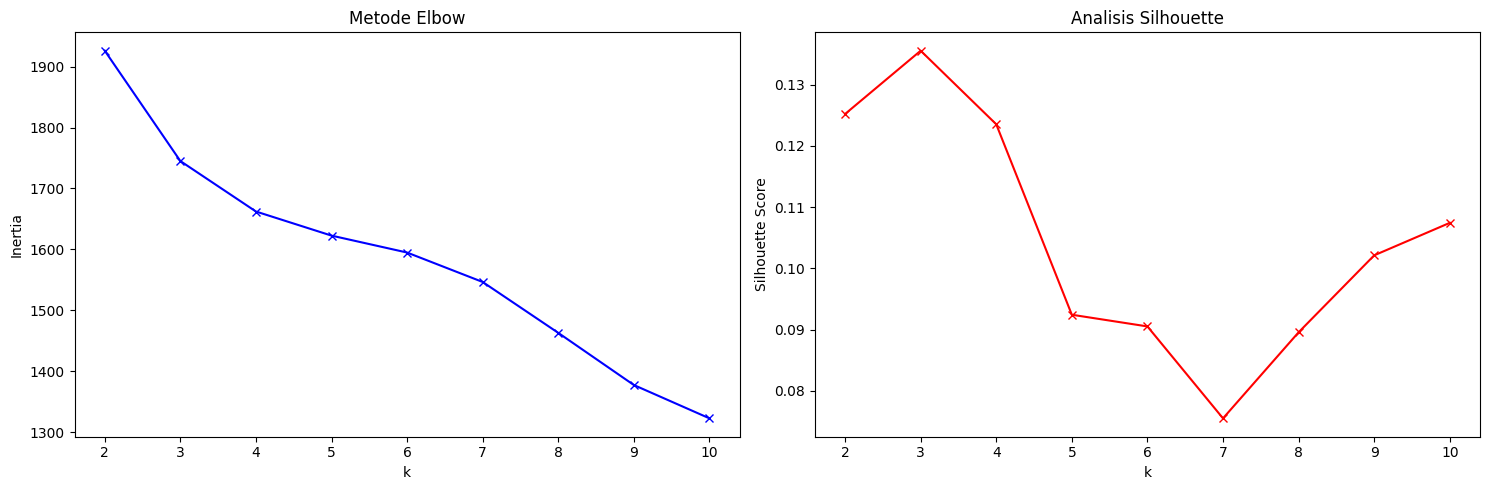


Jumlah Cluster Optimal: 4
Silhouette Score: 0.124


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

def implement_kmeans(normalized_features):
    print("\n4. IMPLEMENTASI K-MEANS")

    # Find optimal k
    K = range(2, 11)
    inertias = []
    silhouette_scores = []

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(normalized_features)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(normalized_features, kmeans.labels_))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(K, inertias, 'bx-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Metode Elbow')

    ax2.plot(K, silhouette_scores, 'rx-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Analisis Silhouette')

    plt.tight_layout()
    plt.show()

    # Determine optimal k
    kl = KneeLocator(K, inertias, curve='convex', direction='decreasing')
    optimal_k = kl.elbow

    print(f"\nJumlah Cluster Optimal: {optimal_k}")
    print(f"Silhouette Score: {silhouette_scores[optimal_k-2]:.3f}")

    # Final clustering
    final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = final_kmeans.fit_predict(normalized_features)

    return clusters, optimal_k, final_kmeans

clusters, optimal_k, kmeans_model = implement_kmeans(normalized_features)


5. ANALISIS HASIL

Cluster 0:
Jumlah anggota: 18

Rata-rata:
X1.1      4.277778
X1.2      4.222222
X1.3      3.777778
X1.4      3.722222
X1.5      4.388889
X2.1      4.777778
X2.2      4.500000
X2.3      4.500000
X2.4      4.555556
X2.5      4.666667
X2.6      4.166667
X3.1      2.833333
X3.2      4.277778
X3.3      4.444444
X3.4      3.944444
X3.5      4.444444
X3.6      4.277778
Y1        4.222222
Y2        3.888889
Y3        3.777778
Y4        4.500000
Y5        4.055556
Y6        4.444444
TTL X1    4.077778
TTL Y     4.148148
Name: 0, dtype: float64

Standar deviasi:
X1.1      0.751904
X1.2      0.548319
X1.3      0.646762
X1.4      0.826442
X1.5      0.501631
X2.1      0.427793
X2.2      0.785905
X2.3      0.514496
X2.4      0.511310
X2.5      0.485071
X2.6      1.150447
X3.1      0.985184
X3.2      0.574513
X3.3      0.511310
X3.4      0.416176
X3.5      0.511310
X3.6      0.460889
Y1        0.427793
Y2        0.832352
Y3        0.942809
Y4        0.514496
Y5        0.998365
Y6 

<ipython-input-8-6f08b302b309>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['Cluster'] = clusters
<ipython-input-8-6f08b302b309>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['TTL X1'] = feature_df[['X1.1', 'X1.2', 'X1.3', 'X1.4', 'X1.5']].mean(axis=1)
<ipython-input-8-6f08b302b309>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

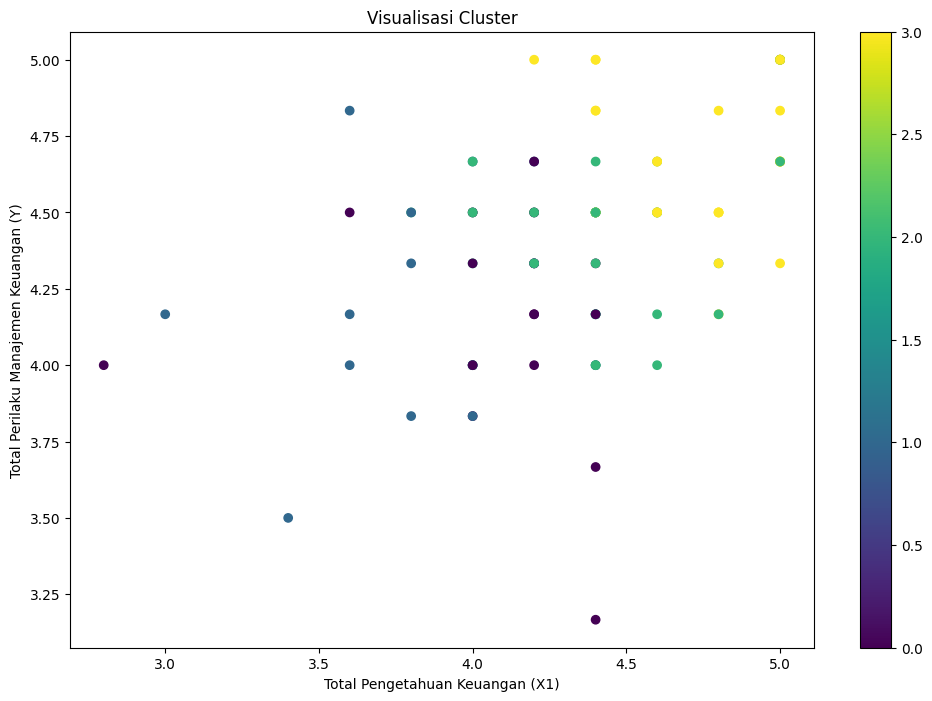

In [8]:
def analyze_results(feature_df, clusters, optimal_k):
    print("\n5. ANALISIS HASIL")

    # Add cluster labels
    feature_df['Cluster'] = clusters

    # Calculate total scores for X1 and Y if they don't exist
    # Assuming X1.1 through X1.5 are the components of X1
    feature_df['TTL X1'] = feature_df[['X1.1', 'X1.2', 'X1.3', 'X1.4', 'X1.5']].mean(axis=1)
    # Assuming Y1 through Y6 are the components of Y
    feature_df['TTL Y'] = feature_df[['Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6']].mean(axis=1)

    # Analyze clusters
    cluster_means = feature_df.groupby('Cluster').mean()
    cluster_stds = feature_df.groupby('Cluster').std()

    for cluster in range(optimal_k):
        print(f"\nCluster {cluster}:")
        print(f"Jumlah anggota: {sum(clusters == cluster)}")
        print("\nRata-rata:")
        print(cluster_means.loc[cluster])
        print("\nStandar deviasi:")
        print(cluster_stds.loc[cluster])

    # Visualize clusters
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(feature_df['TTL X1'],
                         feature_df['TTL Y'],
                         c=clusters,
                         cmap='viridis')
    plt.xlabel('Total Pengetahuan Keuangan (X1)')
    plt.ylabel('Total Perilaku Manajemen Keuangan (Y)')
    plt.title('Visualisasi Cluster')
    plt.colorbar(scatter)
    plt.show()

    return cluster_means, cluster_stds

cluster_means, cluster_stds = analyze_results(feature_df, clusters, optimal_k)

In [9]:
def generate_recommendations(cluster_means, cluster_stds):
    print("\n6. REKOMENDASI")

    for cluster in cluster_means.index:
        print(f"\nRekomendasi untuk Cluster {cluster}:")

        # Calculate performance metrics
        metrics = {
            'Pengetahuan Keuangan': cluster_means.loc[cluster, ['X1.1', 'X1.2', 'X1.3', 'X1.4', 'X1.5']].mean(),
            'Sikap Keuangan': cluster_means.loc[cluster, ['X2.1', 'X2.2', 'X2.3', 'X2.4', 'X2.5', 'X2.6']].mean(),
            'Kepribadian': cluster_means.loc[cluster, ['X3.1', 'X3.2', 'X3.3', 'X3.4', 'X3.5', 'X3.6']].mean(),
            'Perilaku Manajemen': cluster_means.loc[cluster, ['Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6']].mean()
        }

        print("\nAnalisis Performa:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.2f}")

        print("\nRekomendasi Spesifik:")
        if metrics['Pengetahuan Keuangan'] < 4.0:
            print("- Perlu pelatihan pengetahuan keuangan dasar")
            print("- Workshop manajemen keuangan UMKM")

        if metrics['Sikap Keuangan'] < 4.0:
            print("- Mentoring sikap pengelolaan keuangan")
            print("- Pelatihan perencanaan keuangan")

        if metrics['Kepribadian'] < 4.0:
            print("- Program pengembangan soft skills")
            print("- Pelatihan leadership dan decision making")

        if metrics['Perilaku Manajemen'] < 4.0:
            print("- Pendampingan implementasi manajemen keuangan")
            print("- Monitoring dan evaluasi berkala")

generate_recommendations(cluster_means, cluster_stds)


6. REKOMENDASI

Rekomendasi untuk Cluster 0:

Analisis Performa:
Pengetahuan Keuangan: 4.08
Sikap Keuangan: 4.53
Kepribadian: 4.04
Perilaku Manajemen: 4.15

Rekomendasi Spesifik:

Rekomendasi untuk Cluster 1:

Analisis Performa:
Pengetahuan Keuangan: 3.85
Sikap Keuangan: 4.34
Kepribadian: 4.42
Perilaku Manajemen: 4.20

Rekomendasi Spesifik:
- Perlu pelatihan pengetahuan keuangan dasar
- Workshop manajemen keuangan UMKM

Rekomendasi untuk Cluster 2:

Analisis Performa:
Pengetahuan Keuangan: 4.41
Sikap Keuangan: 4.07
Kepribadian: 4.33
Perilaku Manajemen: 4.41

Rekomendasi Spesifik:

Rekomendasi untuk Cluster 3:

Analisis Performa:
Pengetahuan Keuangan: 4.79
Sikap Keuangan: 4.77
Kepribadian: 4.60
Perilaku Manajemen: 4.75

Rekomendasi Spesifik:
